In [1]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_percentage_error as MAPE 

In [3]:
# 读取player 的数据
player = pd.read_csv("../datafrom200/players.csv")
x_list = player.columns[7:-5]
print(x_list)
X = player[x_list]
y = player["value"]
len(x_list)

Index(['Crossing', 'Finishing', 'Heading_Accuracy', 'Short_Passing', 'Volleys',
       'Dribbling', 'Curve', 'FK_Accuracy', 'Long_Passing', 'Ball_Control',
       'Acceleration', 'Sprint_Speed', 'Agility', 'Reactions', 'Balance',
       'Shot_Power', 'Jumping', 'Stamina', 'Strength', 'Long_Shots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Defensive_Awareness', 'Standing_Tackle',
       'Sliding_Tackle'],
      dtype='object')


29

In [4]:
# 划分训练集 train, validation, test : 0.7, 0.15, 0.15
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=0.3)
X_validation, X_test, y_validation, y_test = train_test_split(X_test_val, y_test_val, test_size=0.5)

In [5]:
# Adaboost
from sklearn.ensemble import AdaBoostRegressor
i = 10
clf = AdaBoostRegressor(n_estimators=i)
clf.fit(X_train, y_train)
print(i, clf.score(X_validation, y_validation))

10 0.787666775360443


In [6]:
# XGBoost
import xgboost as xgb
n, depth = 60, 20
bst = xgb.XGBRFRegressor(n_estimators=n, max_depth=depth)
bst.fit(X_train, y_train)
print(n, depth, bst.score(X_validation, y_validation))

60 20 0.8905902453436201


In [7]:
import lightgbm as lgb
leaves, depth, n = 31, 19, 500
cbr = lgb.LGBMRegressor(num_leaves=leaves, max_depth=depth, n_estimators=n)
cbr.fit(X_train, y_train)
print(leaves, depth, n, cbr.score(X_validation, y_validation))

31 19 500 0.8932794372920507


In [8]:
# 随机森林
from sklearn.ensemble import RandomForestRegressor
n = 80
clf = RandomForestRegressor(n_estimators=n)
clf.fit(X_train, y_train)
print(n, clf.score(X_validation, y_validation))

80 0.8962065346433552


In [9]:
# GBDT
from sklearn.ensemble import GradientBoostingRegressor
n = 600
reg = GradientBoostingRegressor(n_estimators=n)
reg.fit(X_train, y_train)
print(n, reg.score(X_validation, y_validation))

600 0.9112689743502802


In [10]:
# Catboost
import catboost
reg = catboost.CatBoostRegressor()
reg.fit(X_train, y_train)
print(reg.score(X_validation, y_validation))

Learning rate set to 0.055843
0:	learn: 8782973.6342756	total: 55.5ms	remaining: 55.4s
1:	learn: 8496953.6930718	total: 57.4ms	remaining: 28.6s
2:	learn: 8240391.3860844	total: 59.4ms	remaining: 19.7s
3:	learn: 7966474.9821039	total: 62.1ms	remaining: 15.5s
4:	learn: 7718414.9173417	total: 64.4ms	remaining: 12.8s
5:	learn: 7487209.3635741	total: 66.7ms	remaining: 11s
6:	learn: 7261650.8976848	total: 69ms	remaining: 9.79s
7:	learn: 7056985.2781638	total: 71.2ms	remaining: 8.83s
8:	learn: 6851875.0660629	total: 73.6ms	remaining: 8.11s
9:	learn: 6658707.6067852	total: 75.7ms	remaining: 7.49s
10:	learn: 6477453.3474925	total: 77.3ms	remaining: 6.95s
11:	learn: 6307908.5520806	total: 79.6ms	remaining: 6.55s
12:	learn: 6134044.9716541	total: 81.2ms	remaining: 6.17s
13:	learn: 5978631.4515854	total: 82.7ms	remaining: 5.83s
14:	learn: 5828853.7232220	total: 84.9ms	remaining: 5.58s
15:	learn: 5695503.3347953	total: 86.7ms	remaining: 5.33s
16:	learn: 5562024.2662084	total: 88.4ms	remaining: 5.11

In [11]:
# list_adaboost # adaboost: 10, 0.6945326685800794
# n_list_lbm = np.array(list_lightgbm) # leaves, depth, n, score : 31, 19, 500, 0.8007898902056965
# list_randomforest # [80, 0.7839175337533079]
# list_gbdt # [n = 600, 0.8264955831199144]
# catboost  defalt: 0.8027687798692258
# list_xgboost # [60, 20, 0.7812782293507701]

最好的模型是 gbdt， 参数为n = 600

0.9112498715969303
0.8941643398420683


In [18]:
explainer_gbdt = shap.Explainer(reg.predict, X_test)
shap_values = explainer_gbdt(X)

Permutation explainer: 10187it [30:20,  5.56it/s]                           


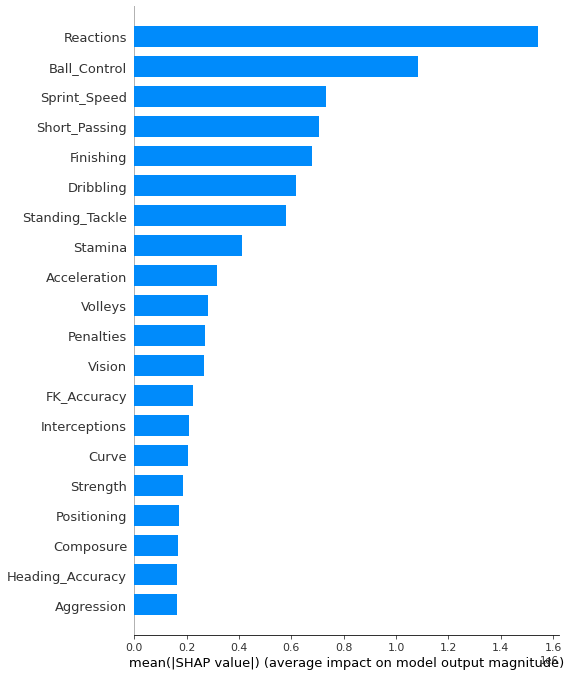

<Figure size 432x288 with 0 Axes>

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt 
# fig, ax = shap.partial_dependence_plot(reg.predict, X_test)
fig = plt.figure(1)
shap.summary_plot(shap_values, X, plot_type="bar")
plt.savefig("../result/shap_values.pdf")
plt.show()


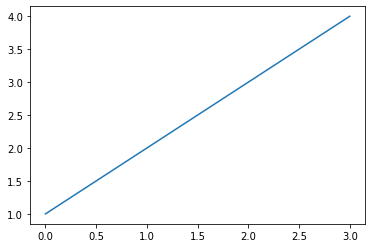

In [5]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.plot([1,2,3,4])
plt.show()